In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [141]:
dff = pd .read_csv('PRSA_Data_Dingling_20130301-20170228.csv')

In [142]:
dff.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

In [143]:
dff.tail()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO     O3  \
35059  35060  2017      2   28    19   11.0  11.0  2.0  2.0  200.0   99.0   
35060  35061  2017      2   28    20   13.0  13.0  2.0  2.0  200.0  101.0   
35061  35062  2017      2   28    21    9.0  14.0  2.0  2.0  200.0  102.0   
35062  35063  2017      2   28    22   10.0  12.0  2.0  2.0  200.0   97.0   
35063  35064  2017      2   28    23   13.0  16.0  4.0  9.0  500.0   74.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
35059  11.7  1008.9 -13.3   0.0  NNE   1.3  Dingling  
35060  10.9  1009.0 -14.0   0.0    N   2.1  Dingling  
35061   9.5  1009.4 -13.0   0.0    N   1.5  Dingling  
35062   7.8  1009.6 -12.6   0.0   NW   1.4  Dingling  
35063   7.0  1009.4 -12.2   0.0    N   1.9  Dingling

No: row number,
---
year: year of data in this row,
---
month: month of data in this row,
---
day: day of data in this row,
---
hour: hour of data in this row,
---
PM2.5: PM2.5 concentration (ug/m^3),
---
PM10: PM10 concentration (ug/m^3)
--
SO2: SO2 concentration (ug/m^3) Sulpher die oxide,
---
NO2: NO2 concentration (ug/m^3) Nitrogen Oxide,
---
CO: CO concentration (ug/m^3) Carbon Dia-Oxide,
---
O3: O3 concentration (ug/m^3) Ozone,
---
TEMP: temperature (degree Celsius),
---
PRES: pressure (hPa),
---
DEWP: dew point temperature (degree Celsius),
---
RAIN: precipitation (mm),
---
wd: wind direction,
---
WSPM: wind speed (m/s),
---
station: name of the air-quality monitoring site.



In [144]:
dff.shape

(35064, 18)

In [145]:
dff.size

631152

In [146]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


PM10 is a particulate matter of 10mm diameter or less.

---


PM2.5 is a particulate matter of 2.5 mm diameter or less.

---


These are the air pollutant present in the air of various diameters which are causing health issues to people. Asian Countries have major problems regarding to 2.5mm air pollutant.

In [147]:
def convert_to_date(x):
  return datetime.strptime(x, '%Y %m %d %H')

In [148]:
dff = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv',
               parse_dates = [['year','month','day','hour']], 
               date_parser= convert_to_date ,keep_date_col = True)

In [149]:
dff.head()

year_month_day_hour  No  year month day hour  PM2.5  PM10  SO2  NO2     CO  \
0 2013-03-01 00:00:00   1  2013     3   1    0    4.0   4.0  3.0  NaN  200.0   
1 2013-03-01 01:00:00   2  2013     3   1    1    7.0   7.0  3.0  NaN  200.0   
2 2013-03-01 02:00:00   3  2013     3   1    2    5.0   5.0  3.0  2.0  200.0   
3 2013-03-01 03:00:00   4  2013     3   1    3    6.0   6.0  3.0  NaN  200.0   
4 2013-03-01 04:00:00   5  2013     3   1    4    5.0   5.0  3.0  NaN  200.0   

     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [150]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [151]:
dff.corr()

No     PM2.5      PM10       SO2       NO2        CO        O3  \
No     1.000000 -0.039594 -0.026991 -0.189954 -0.018114  0.048346 -0.053348   
PM2.5 -0.039594  1.000000  0.868127  0.475117  0.718170  0.802737 -0.100542   
PM10  -0.026991  0.868127  1.000000  0.450585  0.653864  0.685482 -0.018229   
SO2   -0.189954  0.475117  0.450585  1.000000  0.610433  0.529182 -0.182096   
NO2   -0.018114  0.718170  0.653864  0.610433  1.000000  0.798753 -0.373625   
CO     0.048346  0.802737  0.685482  0.529182  0.798753  1.000000 -0.303275   
O3    -0.053348 -0.100542 -0.018229 -0.182096 -0.373625 -0.303275  1.000000   
TEMP  -0.133881 -0.089939 -0.055309 -0.312980 -0.316337 -0.282312  0.589474   
PRES   0.169126 -0.008005 -0.038691  0.245297  0.200609  0.172220 -0.457838   
DEWP  -0.080457  0.134558  0.061941 -0.284595 -0.109579 -0.031765  0.316821   
RAIN   0.004272 -0.009221 -0.023223 -0.040201 -0.032778 -0.004138  0.029867   
WSPM   0.061228 -0.255714 -0.126962 -0.092249 -0.302927 -0.269783  0.265726   

           TEMP      PRES      DEWP      RAIN      WSPM  
No    -0.133881  0.169126 -0.080457  0.004272  0.061228  
PM2.5 -0.089939 -0.008005  0.134558 -0.009221 -0.255714  
PM10  -0.055309 -0.038691  0.061941 -0.023223 -0.126962  
SO2   -0.312980  0.245297 -0.284595 -0.040201 -0.092249  
NO2   -0.316337  0.200609 -0.109579 -0.032778 -0.302927  
CO    -0.282312  0.172220 -0.031765 -0.004138 -0.269783  
O3     0.589474 -0.457838  0.316821  0.029867  0.265726  
TEMP   1.000000 -0.837844  0.823684  0.035177 -0.002456  
PRES  -0.837844  1.000000 -0.765659 -0.058766  0.086551  
DEWP   0.823684 -0.765659  1.000000  0.090351 -0.313721  
RAIN   0.035177 -0.058766  0.090351  1.000000  0.007476  
WSPM  -0.002456  0.086551 -0.313721  0.007476  1.000000

In [152]:
dff.month = pd.to_numeric(dff.month)

In [153]:
dff.shape

(35064, 19)

In [154]:
dff.isna().sum()

year_month_day_hour       0
No                        0
year                      0
month                     0
day                       0
hour                      0
PM2.5                   779
PM10                    656
SO2                     730
NO2                    1234
CO                     2012
O3                     1214
TEMP                     53
PRES                     50
DEWP                     53
RAIN                     51
wd                      140
WSPM                     43
station                   0
dtype: int64

In [155]:
dff.nunique().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5                    486
PM10                     554
SO2                      327
NO2                      636
CO                       103
O3                       792
TEMP                     998
PRES                     593
DEWP                     602
RAIN                     116
wd                        16
WSPM                      95
station                    1
dtype: int64>

In [156]:
dff.describe()

No         month         PM2.5          PM10           SO2  \
count  35064.000000  35064.000000  34285.000000  34408.000000  34334.000000   
mean   17532.500000      6.522930     65.989497     83.739723     11.749650   
std    10122.249256      3.448752     72.267723     79.541685     15.519259   
min        1.000000      1.000000      3.000000      2.000000      0.285600   
25%     8766.750000      4.000000     14.000000     26.000000      2.000000   
50%    17532.500000      7.000000     41.000000     60.000000      5.000000   
75%    26298.250000     10.000000     93.000000    117.000000     15.000000   
max    35064.000000     12.000000    881.000000    905.000000    156.000000   

                NO2            CO            O3          TEMP          PRES  \
count  33830.000000  33052.000000  33850.000000  35011.000000  35014.000000   
mean      27.585467    904.896073     68.548371     13.686111   1007.760278   
std       26.383882    903.306220     53.764424     11.365313     10.225664   
min        1.026500    100.000000      0.214200    -16.600000    982.400000   
25%        9.000000    300.000000     31.000000      3.400000    999.300000   
50%       19.000000    600.000000     61.000000     14.700000   1007.400000   
75%       38.000000   1200.000000     90.000000     23.300000   1016.000000   
max      205.000000  10000.000000    500.000000     41.400000   1036.500000   

               DEWP          RAIN          WSPM  
count  35011.000000  35013.000000  35021.000000  
mean       1.505495      0.060366      1.853836  
std       13.822099      0.752899      1.309808  
min      -35.100000      0.000000      0.000000  
25%      -10.200000      0.000000      1.000000  
50%        1.800000      0.000000      1.500000  
75%       14.200000      0.000000      2.300000  
max       27.200000     52.100000     10.000000

In [157]:
dff_mod = dff.copy()
df = dff_mod.set_index('year_month_day_hour')
df.head()

No  year  month day hour  PM2.5  PM10  SO2  NO2     CO  \
year_month_day_hour                                                           
2013-03-01 00:00:00   1  2013      3   1    0    4.0   4.0  3.0  NaN  200.0   
2013-03-01 01:00:00   2  2013      3   1    1    7.0   7.0  3.0  NaN  200.0   
2013-03-01 02:00:00   3  2013      3   1    2    5.0   5.0  3.0  2.0  200.0   
2013-03-01 03:00:00   4  2013      3   1    3    6.0   6.0  3.0  NaN  200.0   
2013-03-01 04:00:00   5  2013      3   1    4    5.0   5.0  3.0  NaN  200.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                       
2013-03-01 00:00:00  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
2013-03-01 01:00:00  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2013-03-01 02:00:00  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
2013-03-01 03:00:00  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
2013-03-01 04:00:00  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [158]:
df.loc['2013':'2015']

No  year  month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                          
2013-03-01 00:00:00      1  2013      3   1    0    4.0    4.0   3.0   NaN   
2013-03-01 01:00:00      2  2013      3   1    1    7.0    7.0   3.0   NaN   
2013-03-01 02:00:00      3  2013      3   1    2    5.0    5.0   3.0   2.0   
2013-03-01 03:00:00      4  2013      3   1    3    6.0    6.0   3.0   NaN   
2013-03-01 04:00:00      5  2013      3   1    4    5.0    5.0   3.0   NaN   
...                    ...   ...    ...  ..  ...    ...    ...   ...   ...   
2015-12-31 19:00:00  24860  2015     12  31   19   85.0   95.0  12.0  73.0   
2015-12-31 20:00:00  24861  2015     12  31   20    NaN  109.0  32.0  79.0   
2015-12-31 21:00:00  24862  2015     12  31   21   80.0  100.0  35.0  81.0   
2015-12-31 22:00:00  24863  2015     12  31   22   93.0   93.0  28.0  76.0   
2015-12-31 23:00:00  24864  2015     12  31   23   98.0   98.0  25.0  75.0   

                         CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00   200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00   200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00   200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00   200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00   200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                     ...   ...   ...     ...   ...   ...  ...   ...   
2015-12-31 19:00:00  1200.0   2.0  -0.6  1021.0  -9.5   0.0   NE   0.6   
2015-12-31 20:00:00  2900.0   2.0  -1.8  1021.2  -9.9   0.0   NW   1.1   
2015-12-31 21:00:00  3200.0   2.0  -1.6  1020.8  -9.7   0.0   NE   0.9   
2015-12-31 22:00:00  3500.0   2.0  -2.9  1020.4  -9.8   0.0  NNW   1.3   
2015-12-31 23:00:00  3600.0   2.0  -3.5  1020.2  -9.7   0.0  NNW   1.3   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2015-12-31 19:00:00  Dingling  
2015-12-31 20:00:00  Dingling  
2015-12-31 21:00:00  Dingling  
2015-12-31 22:00:00  Dingling  
2015-12-31 23:00:00  Dingling  

[24864 rows x 18 columns]

In [159]:
df.year['2013':'2015'].shape  #alternative Method

(24864,)

# Correlation Analysis with PM2.5 Variabel

In [160]:
df['2014':'2016'][['month','PM2.5']].groupby('month').describe()     # Univariate statistical analysis

PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0

In [161]:
df['2014':'2016'][['month','PM2.5','TEMP']].groupby('month').agg({'PM2.5':['max'],'TEMP':['min','max']})    #Bivariate analysis

PM2.5  TEMP      
         max   min   max
month                   
1      443.0 -16.6  12.4
2      881.0 -10.9  14.0
3      474.0  -6.4  26.0
4      346.0   1.3  32.0
5      358.0   7.0  41.4
6      245.0  15.1  38.1
7      252.0  16.8  39.2
8      217.0  16.6  36.3
9      240.0   7.8  34.5
10     414.0  -1.4  28.1
11     394.0 -10.3  20.8
12     647.0  -9.7  11.6

In [162]:
# Month wise stats of PM2.5
df.groupby('month').agg(median = ('PM2.5','median'),mean = ('PM2.5','mean'),max = ('PM2.5','max'),min = ('PM2.5','min'))

median       mean    max  min
month                               
1        38.0  73.156108  536.0  3.0
2        30.0  78.147126  881.0  3.0
3        52.0  84.098038  474.0  3.0
4        51.0  64.755974  346.0  3.0
5        41.0  53.704803  358.0  3.0
6        38.0  56.471182  368.0  3.0
7        45.0  59.806038  252.0  3.0
8        30.0  43.490136  290.0  3.0
9        31.0  49.931039  285.0  3.0
10       42.0  80.305925  414.0  3.0
11       49.0  69.901713  394.0  3.0
12       42.0  78.821441  647.0  3.0

In [163]:
# PM2.5 stat according to Wind Direction
df.groupby('wd').agg(median = ('PM2.5','median'),mean = ('PM2.5','mean'),max = ('PM2.5','max'),min = ('PM2.5','min'))

median       mean    max  min
wd                                
E      70.0  88.623363  434.0  3.0
ENE    56.5  77.685514  647.0  3.0
ESE    78.5  96.492276  632.0  3.0
N      29.0  57.546221  536.0  3.0
NE     32.0  57.390083  530.0  3.0
NNE    26.0  53.946239  881.0  3.0
NNW    33.0  62.790775  548.0  3.0
NW     21.0  52.769116  535.0  3.0
S      52.0  72.497281  511.0  3.0
SE     70.0  85.045709  617.0  3.0
SSE    61.0  79.925967  614.0  3.0
SSW    50.0  73.078253  493.0  3.0
SW     46.0  70.233140  459.0  3.0
W      22.0  49.488104  446.0  3.0
WNW    14.0  37.307447  515.0  3.0
WSW    39.0  66.725926  451.0  3.0

In [164]:
#PM2.5 stat according to Wind Speed
df.groupby('WSPM').agg(median = ('PM2.5','median'),mean = ('PM2.5','mean'),max = ('PM2.5','max'),min = ('PM2.5','min'))

median        mean    max   min
WSPM                                 
0.0     60.0   85.652709  415.0   3.0
0.1     63.0   86.243655  341.0   3.0
0.2     56.0   87.194313  389.0   3.0
0.3     73.0  101.761589  438.0   3.0
0.4     61.0   88.110390  446.0   3.0
...      ...         ...    ...   ...
9.2     18.0   45.000000  114.0   3.0
9.3     13.0   35.666667   88.0   6.0
9.4      9.0    9.000000    9.0   9.0
9.6     42.0   93.333333  231.0   7.0
10.0    27.0   27.000000   27.0  27.0

[95 rows x 4 columns]

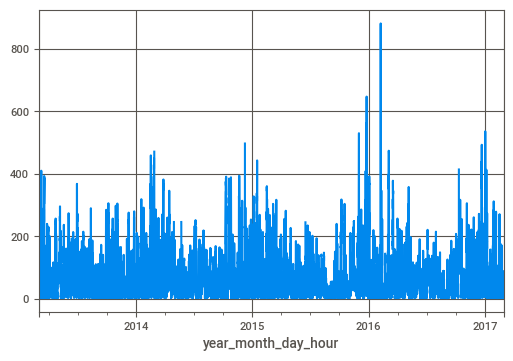

In [165]:
df['PM2.5'].plot(grid = True)          # To find Seasonality from the data


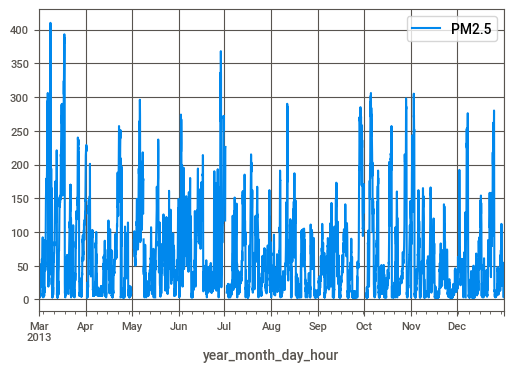

In [166]:
# Yearwise distribution of PM2.5
df.loc['2013'][['PM2.5']].plot(grid = True)

In [223]:
df.loc['2013'][['DEWP']].plot(grid = True)

AssertionError: ignored

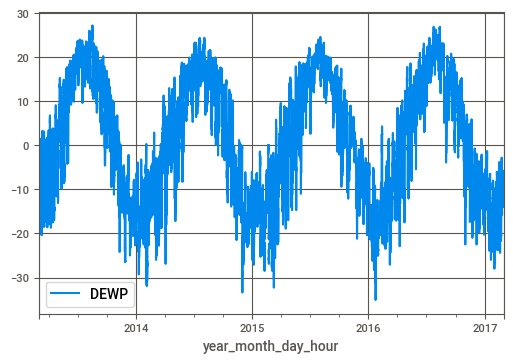

In [222]:
df[['DEWP']].plot(grid = True)

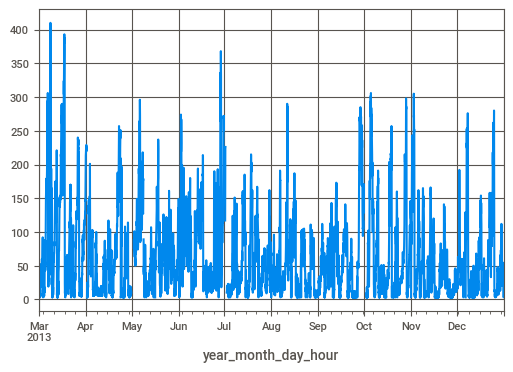

In [167]:
aq_df_2013 = df.loc['2013']
pm_df_2013 = aq_df_2013['PM2.5']
pm_df_2013.plot(grid = True)                 #Same as above just used different method

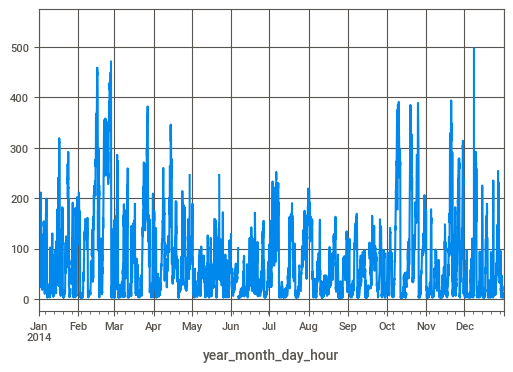

In [168]:
aq_df_2014 = df.loc['2014']
pm_df_2014 = aq_df_2014['PM2.5']
pm_df_2014.plot(grid = True)

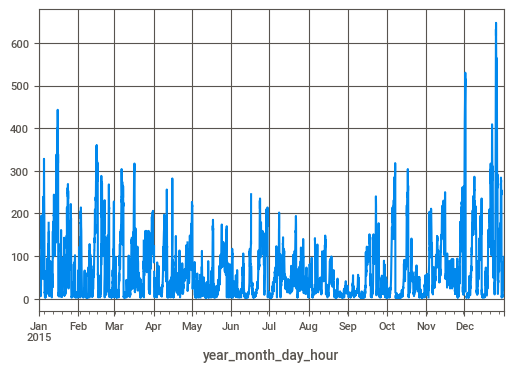

In [169]:
aq_df_2015 = df.loc['2015']
pm_df_2015 = aq_df_2015['PM2.5']
pm_df_2015.plot(grid = True)

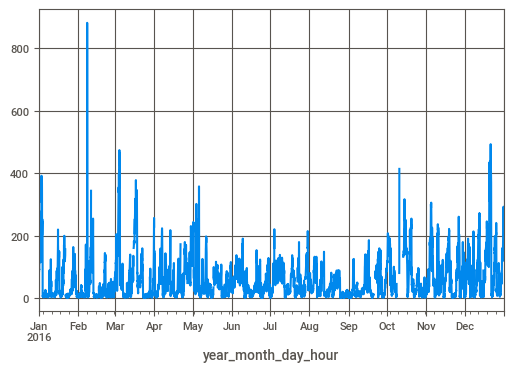

In [170]:
aq_df_2016 = df.loc['2016']
pm_df_2016 = aq_df_2016['PM2.5']
pm_df_2016.plot(grid = True)

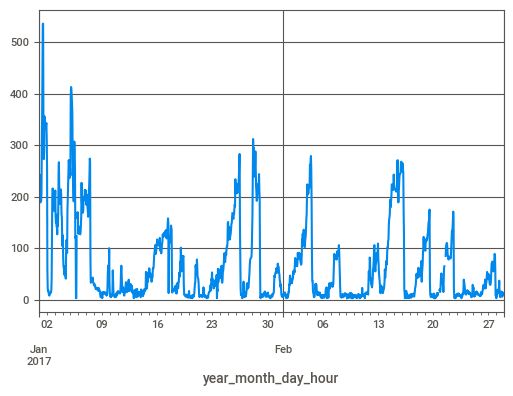

In [171]:
aq_df_2017 = df.loc['2017']
pm_df_2017 = aq_df_2017['PM2.5']
pm_df_2017.plot(grid = True)

In [172]:
import plotly.express as px

fig = px.line(dff,x = 'year_month_day_hour', y = 'PM2.5', title = 'PM2.5 with slider')
fig.update_xaxes(rangeslider_visible = True)
fig.show()

In [173]:
import plotly.express as px

fig = px.line(dff,x = 'year_month_day_hour', y = 'PM2.5', title = 'PM2.5 with slider')
fig.update_xaxes(rangeslider_visible = True,
                 rangeselector = dict(
                     buttons = list([
                         dict(count = 1, label = '1y', step = 'year',stepmode = 'backward'),
                         dict(count = 2, label = '2y', step = 'year',stepmode = 'backward'),
                         dict(count = 3, label = '3y', step = 'year',stepmode = 'backward'),
                         dict(step = 'all')
                     ])
                 )
                )
fig.show()

In [174]:
fig = px.line(dff,x = 'year_month_day_hour', y = 'TEMP', title = 'TEMP with slider')
fig.update_xaxes(rangeslider_visible = True,
                 rangeselector = dict(
                     buttons = list([
                         dict(count = 1, label = '1y', step = 'year',stepmode = 'backward'),
                         dict(count = 2, label = '2y', step = 'year',stepmode = 'backward'),
                         dict(count = 3, label = '3y', step = 'year',stepmode = 'backward'),
                         dict(step = 'all')
                     ])
                 )
                )
fig.show()

<Figure size 1800x1000 with 0 Axes>

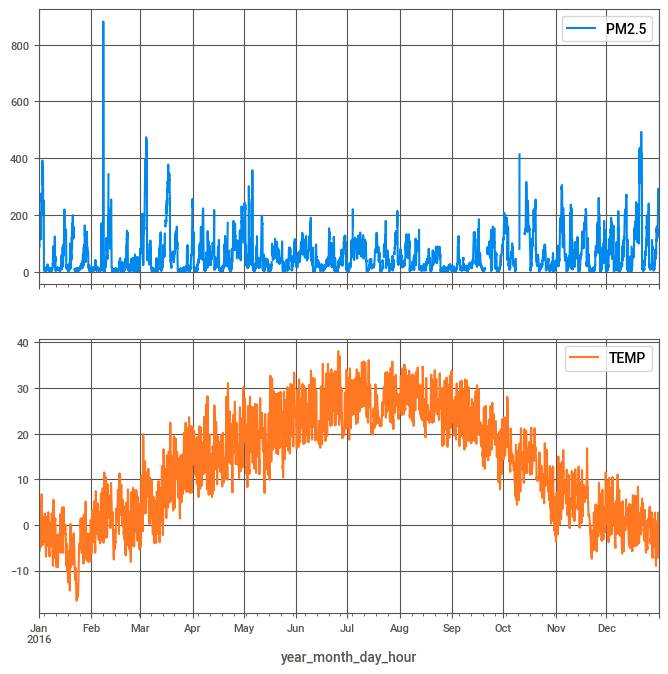

In [175]:
# PM2.5 trend according to temperature 
plt.figure(figsize = (18,10))
df.loc['2016'][['PM2.5','TEMP']].plot(grid = True,subplots = True,figsize = (8,8))
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc646580040>,
      dtype=object)

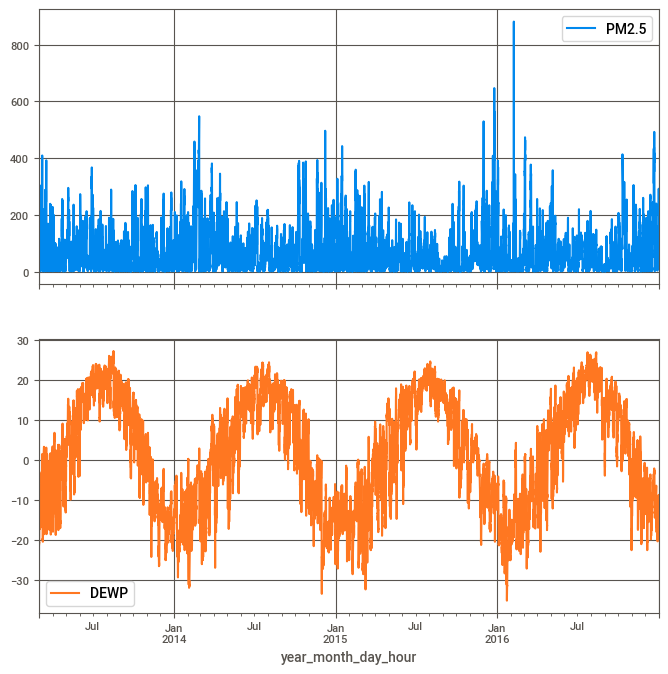

In [226]:
# PM2.5 trend according to Dew Point Temperature
df1.loc['2013':'2016'][['PM2.5','DEWP']].plot(grid = True,subplots = True,figsize = (8,8))   # df1 is explained at last where we handled null values

<Figure size 1800x1000 with 0 Axes>

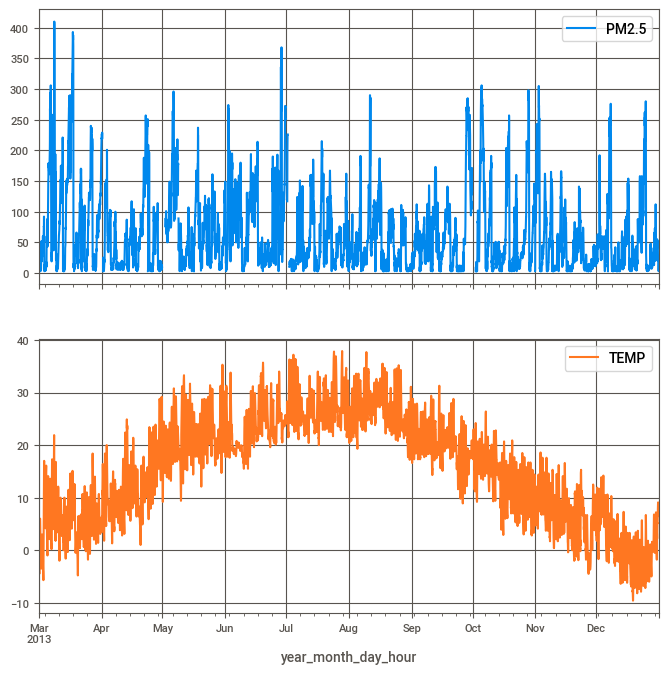

In [177]:
plt.figure(figsize = (18,10))
df.loc['2013'][['PM2.5','TEMP']].plot(grid = True,subplots = True,figsize = (8,8))
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc64bfa2ac0>,
      dtype=object)

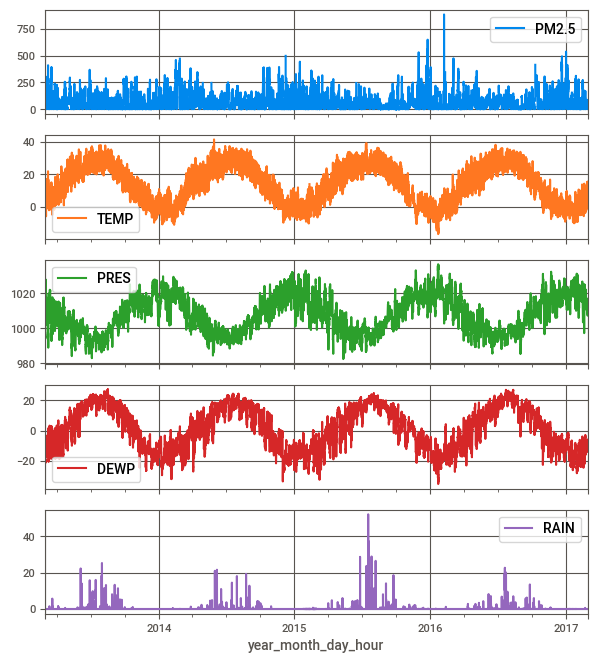

In [178]:
df[['PM2.5','TEMP','PRES','DEWP','RAIN']].plot(grid = True,subplots = True,figsize = (7,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc64c630f70>,
      dtype=object)

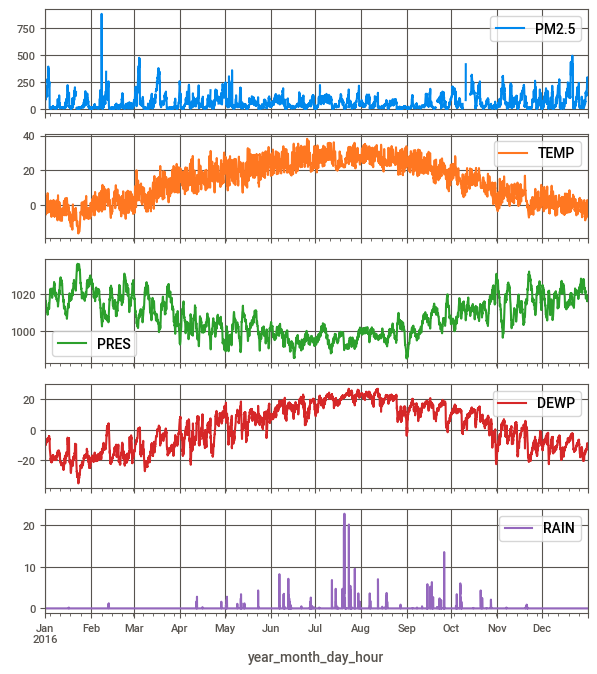

In [179]:
df.loc['2016'][['PM2.5','TEMP','PRES','DEWP','RAIN']].plot(grid = True,subplots = True,figsize = (7,8))

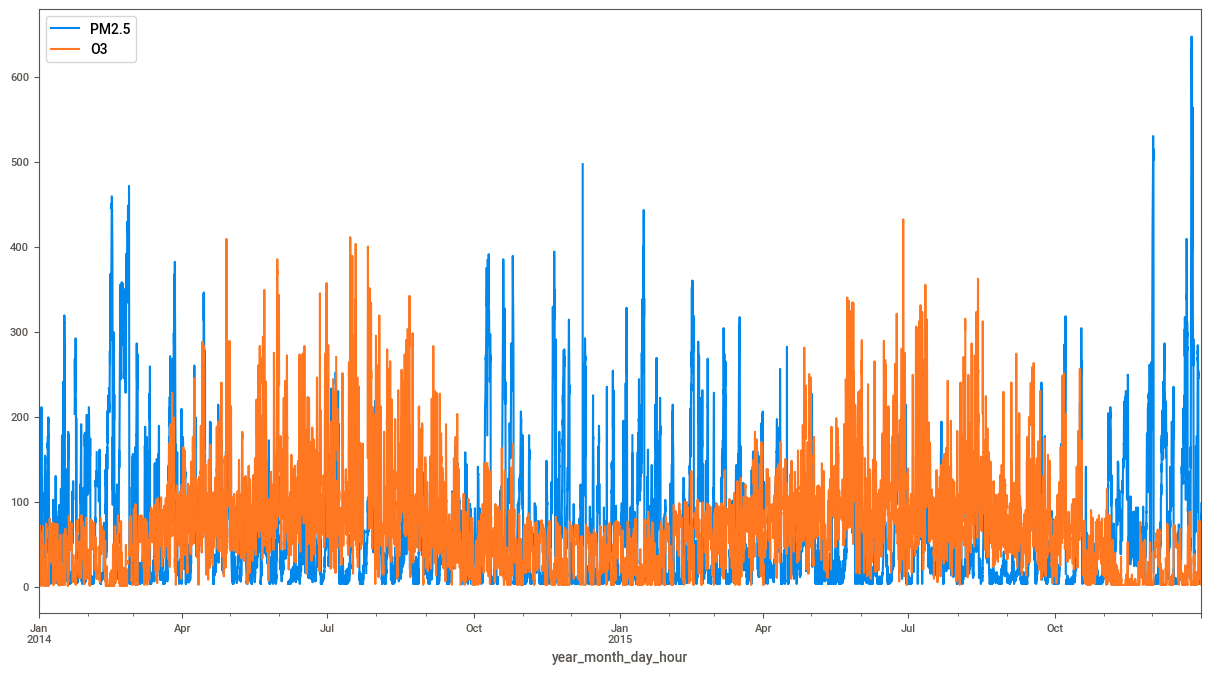

In [180]:
df['2014':'2015'][['PM2.5','O3']].plot(figsize = (15,8),xlabel = 'year_month_day_hour')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc64fa60a90>,
      dtype=object)

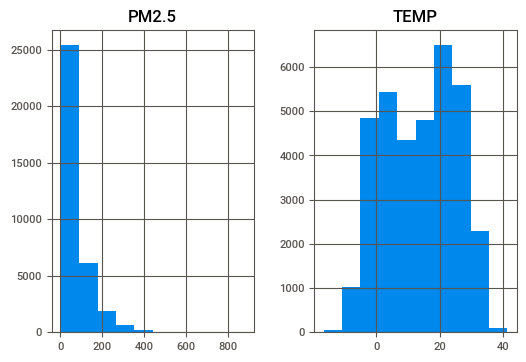

In [181]:
df[['PM2.5','TEMP']].hist()

In [182]:
df[df['PM2.5'].isnull()]

No  year  month day hour  PM2.5  PM10   SO2   NO2  CO  \
year_month_day_hour                                                             
2013-04-01 08:00:00    753  2013      4   1    8    NaN   NaN   NaN   NaN NaN   
2013-04-01 09:00:00    754  2013      4   1    9    NaN   NaN   NaN   NaN NaN   
2013-04-01 10:00:00    755  2013      4   1   10    NaN   NaN   NaN   NaN NaN   
2013-04-01 11:00:00    756  2013      4   1   11    NaN   NaN   NaN   NaN NaN   
2013-04-01 12:00:00    757  2013      4   1   12    NaN   NaN   NaN   NaN NaN   
...                    ...   ...    ...  ..  ...    ...   ...   ...   ...  ..   
2017-02-20 15:00:00  34864  2017      2  20   15    NaN   NaN   NaN   NaN NaN   
2017-02-20 16:00:00  34865  2017      2  20   16    NaN   NaN   NaN   NaN NaN   
2017-02-20 18:00:00  34867  2017      2  20   18    NaN   NaN   NaN   NaN NaN   
2017-02-21 11:00:00  34884  2017      2  21   11    NaN   NaN  26.0  68.0 NaN   
2017-02-21 13:00:00  34886  2017      2  21   13    NaN   NaN   NaN   NaN NaN   

                      O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                      
2013-04-01 08:00:00  NaN  11.0  1005.9  -3.2   0.0   NW   7.2  Dingling  
2013-04-01 09:00:00  NaN  10.6  1007.0  -3.5   0.0  NNW   4.5  Dingling  
2013-04-01 10:00:00  NaN  13.2  1007.8  -3.6   0.0  NNW   4.5  Dingling  
2013-04-01 11:00:00  NaN  13.8  1007.7  -4.9   0.0  NNE   4.0  Dingling  
2013-04-01 12:00:00  NaN  15.3  1007.9  -5.7   0.0   NE   5.0  Dingling  
...                  ...   ...     ...   ...   ...  ...   ...       ...  
2017-02-20 15:00:00  NaN   4.2  1022.0 -21.0   0.0  WNW   3.1  Dingling  
2017-02-20 16:00:00  NaN   4.4  1022.1 -21.7   0.0  WNW   3.4  Dingling  
2017-02-20 18:00:00  NaN   3.3  1022.2 -20.9   0.0   NE   1.1  Dingling  
2017-02-21 11:00:00  5.0  -0.5  1022.7 -16.0   0.0  ESE   1.9  Dingling  
2017-02-21 13:00:00  NaN  -1.0  1021.5  -9.4   0.0   SW   1.7  Dingling  

[779 rows x 18 columns]

#Correlation Analysis with PM10 Variabel

In [183]:
df['2014':'2016'][['month','PM10']].groupby('month').describe()     # Univariate statistical analysis

PM10                                                       
        count        mean         std  min   25%   50%    75%    max
month                                                               
1      2176.0   88.241222   77.145596  3.0  28.0  65.0  130.0  443.0
2      1979.0   97.071753  107.632252  3.0  21.0  53.0  138.5  905.0
3      2211.0  122.754365  106.917776  3.0  36.0  95.0  182.5  895.0
4      2111.0  108.348271   82.394361  3.0  52.0  91.0  147.0  792.0
5      2191.0   79.701506   66.478871  3.0  30.0  66.0  112.0  828.0
6      2121.0   58.473409   47.972076  3.0  20.0  43.0   88.0  249.0
7      2207.0   71.417852   50.224316  3.0  30.7  60.0  104.0  294.0
8      2210.0   56.417014   51.746895  5.0  21.0  43.0   77.0  650.0
9      2086.0   56.559732   47.052078  3.0  18.0  39.0   88.0  286.0
10     2184.0   92.271520   88.848412  3.0  22.0  63.0  137.0  414.0
11     2142.0   93.291270   79.073687  3.0  32.0  70.5  138.0  623.0
12     2190.0  100.627854  106.587140  3.0  25.0  66.0  143.0  771.0

In [184]:
df['2014':'2016'][['month','PM10','TEMP']].groupby('month').agg({'PM10':['max'],'TEMP':['min','max']})    #Bivariate analysis

PM10  TEMP      
         max   min   max
month                   
1      443.0 -16.6  12.4
2      905.0 -10.9  14.0
3      895.0  -6.4  26.0
4      792.0   1.3  32.0
5      828.0   7.0  41.4
6      249.0  15.1  38.1
7      294.0  16.8  39.2
8      650.0  16.6  36.3
9      286.0   7.8  34.5
10     414.0  -1.4  28.1
11     623.0 -10.3  20.8
12     771.0  -9.7  11.6

In [185]:
# Month wise stats of PM10
df.groupby('month').agg(median = ('PM10','median'),mean = ('PM10','mean'),max = ('PM10','max'),min = ('PM10','min'))

median        mean    max  min
month                                
1        62.0   89.023277  553.0  3.0
2        48.0   88.866919  905.0  3.0
3        93.0  119.637254  895.0  2.0
4        85.0  101.288423  792.0  2.0
5        75.0   88.100724  828.0  2.0
6        51.0   65.728430  388.0  2.0
7        56.0   67.889530  294.0  2.0
8        42.0   55.181898  650.0  2.0
9        42.0   58.029132  298.0  2.0
10       64.0   91.420706  414.0  2.0
11       64.0   87.897204  720.0  3.0
12       59.0   91.406410  771.0  3.0

In [186]:
# PM10 stats according to Wind Direction
df.groupby('month').agg(median = ('PM10','median'),mean = ('PM10','mean'),max = ('PM10','max'),min = ('PM10','min'))

median        mean    max  min
month                                
1        62.0   89.023277  553.0  3.0
2        48.0   88.866919  905.0  3.0
3        93.0  119.637254  895.0  2.0
4        85.0  101.288423  792.0  2.0
5        75.0   88.100724  828.0  2.0
6        51.0   65.728430  388.0  2.0
7        56.0   67.889530  294.0  2.0
8        42.0   55.181898  650.0  2.0
9        42.0   58.029132  298.0  2.0
10       64.0   91.420706  414.0  2.0
11       64.0   87.897204  720.0  3.0
12       59.0   91.406410  771.0  3.0

In [187]:
#PM10 stat according to Wind Speed
df.groupby('WSPM').agg(median = ('PM10','median'),mean = ('PM10','mean'),max = ('PM10','max'),min = ('PM10','min'))

median        mean    max    min
WSPM                                  
0.0     67.0   87.809406  416.0    2.0
0.1     64.0   89.715736  345.0    5.0
0.2     72.0   92.952607  389.0    2.0
0.3     87.0  113.282895  438.0    3.0
0.4     73.0   94.974082  448.0    3.0
...      ...         ...    ...    ...
9.2    270.0  209.666667  272.0   87.0
9.3     79.0  142.333333  276.0   72.0
9.4    136.0  136.000000  136.0  136.0
9.6    231.0  167.000000  244.0   26.0
10.0   410.0  410.000000  410.0  410.0

[95 rows x 4 columns]

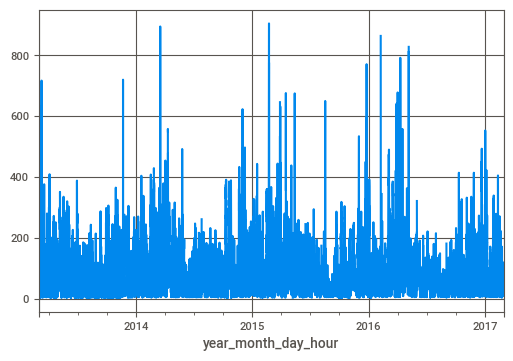

In [188]:
# To find Seasonality from the data
df['PM10'].plot(grid = True)

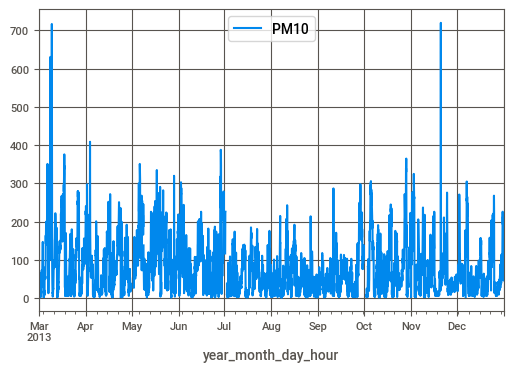

In [189]:
# Yearwise distribution of PM10
df.loc['2013'][['PM10']].plot(grid = True)

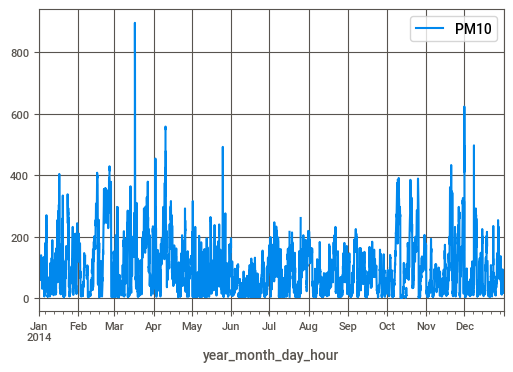

In [190]:
df.loc['2014'][['PM10']].plot(grid = True)

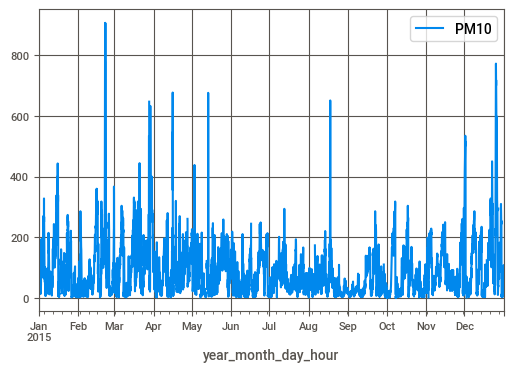

In [191]:
df.loc['2015'][['PM10']].plot(grid = True)

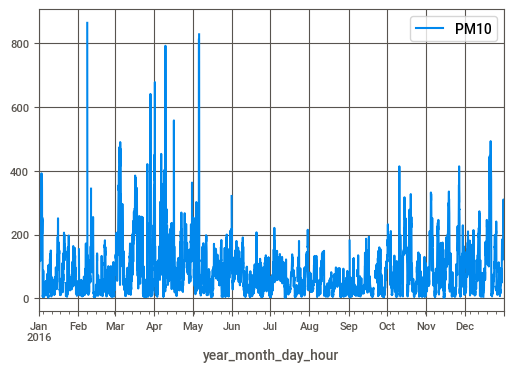

In [192]:
df.loc['2016'][['PM10']].plot(grid = True)

In [193]:
# PM10 distribution yearly
fig = px.line(dff,x = 'year_month_day_hour', y = 'PM10', title = 'PM2.5 with slider')
fig.update_xaxes(rangeslider_visible = True)
fig.show()

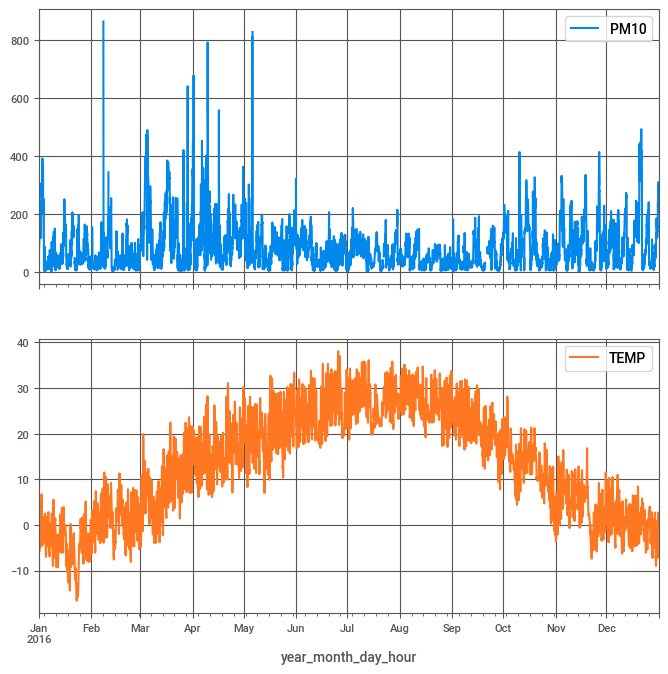

In [194]:
# PM10 trend according to temperature 
df.loc['2016'][['PM10','TEMP']].plot(grid = True,subplots = True,figsize = (8,8))
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc65c4d2ee0>,
      dtype=object)

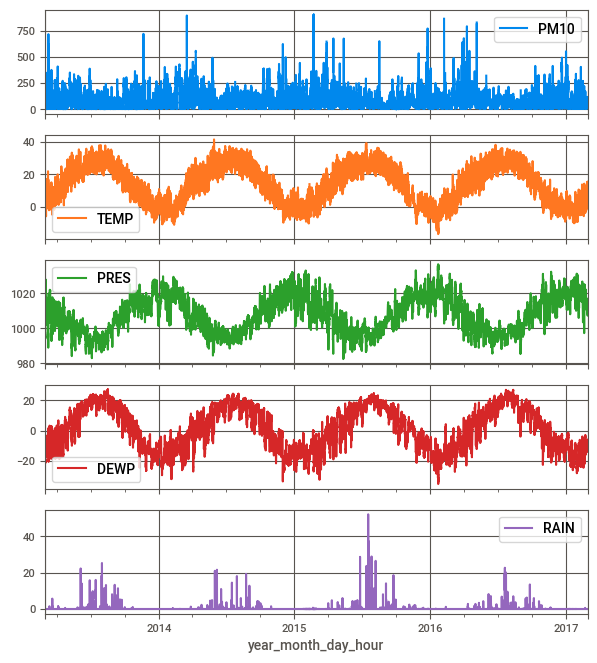

In [195]:
# PM0 Trend with respect to Temperature,pressure,Rain
df[['PM10','TEMP','PRES','DEWP','RAIN']].plot(grid = True,subplots = True,figsize = (7,8))

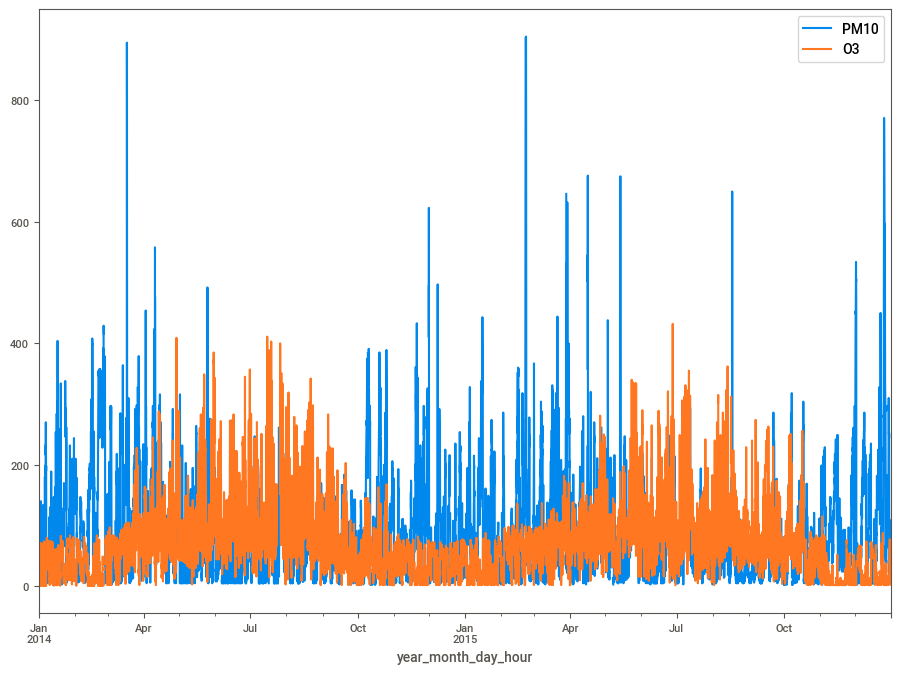

In [196]:
# PM10 trend with respect to O3
df['2014':'2015'][['PM10','O3']].plot(figsize = (11,8),xlabel = 'year_month_day_hour')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc645cb6550>,
      dtype=object)

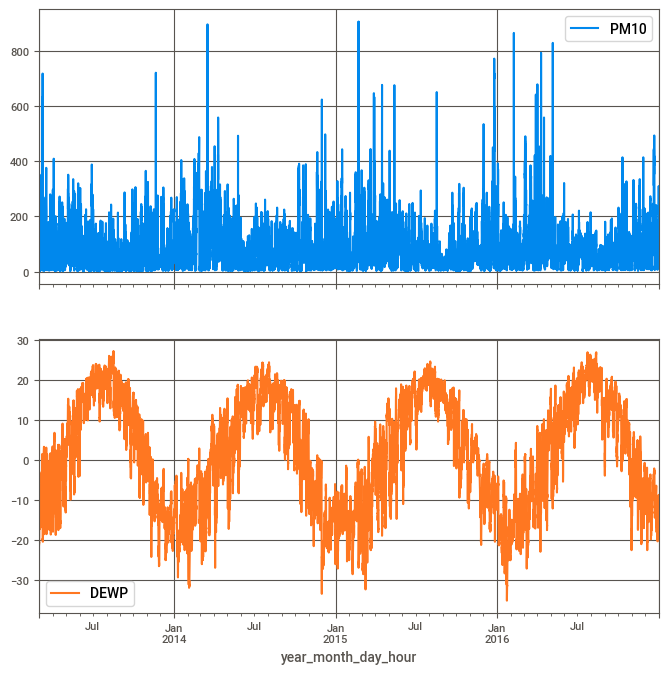

In [227]:
# PM10 trend according to Dew Point Temperature
df1.loc['2013':'2016'][['PM10','DEWP']].plot(grid = True,subplots = True,figsize = (8,8))

In [197]:
#! pip install sweetviz

In [198]:
X = df.drop('station',axis = 1)
y = df['station']

In [199]:
import sweetviz as si
my_report = si.analyze(X)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [200]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [201]:
df1 = df.interpolate(method = 'time',)
df1.isnull().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          2
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
dtype: int64

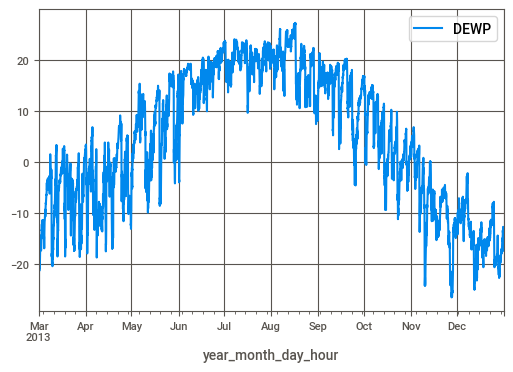

In [224]:
df1.loc['2013'][['DEWP']].plot(grid = True)

In [202]:
df1[df1['NO2'].isnull()]

No  year  month day hour  PM2.5  PM10  SO2  NO2     CO  \
year_month_day_hour                                                           
2013-03-01 00:00:00   1  2013      3   1    0    4.0   4.0  3.0  NaN  200.0   
2013-03-01 01:00:00   2  2013      3   1    1    7.0   7.0  3.0  NaN  200.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                       
2013-03-01 00:00:00  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
2013-03-01 01:00:00  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling

In [203]:
df1.loc['2013-03-01'][['NO2']]

NO2
year_month_day_hour          
2013-03-01 00:00:00       NaN
2013-03-01 01:00:00       NaN
2013-03-01 02:00:00  2.000000
2013-03-01 03:00:00  2.666667
2013-03-01 04:00:00  3.333333
2013-03-01 05:00:00  4.000000
2013-03-01 06:00:00  4.000000
2013-03-01 07:00:00  2.000000
2013-03-01 08:00:00  3.000000
2013-03-01 09:00:00  2.000000
2013-03-01 10:00:00  2.000000
2013-03-01 11:00:00  2.000000
2013-03-01 12:00:00  2.000000
2013-03-01 13:00:00  2.000000
2013-03-01 14:00:00  2.000000
2013-03-01 15:00:00  2.000000
2013-03-01 16:00:00  2.000000
2013-03-01 17:00:00  2.000000
2013-03-01 18:00:00  2.000000
2013-03-01 19:00:00  2.000000
2013-03-01 20:00:00  2.000000
2013-03-01 21:00:00  2.000000
2013-03-01 22:00:00  2.000000
2013-03-01 23:00:00  2.000000

In [204]:
df1['NO2'].fillna(method = 'bfill',inplace = True)

In [205]:
df1.isnull().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
dtype: int64

In [206]:
df1.head()

No  year  month day hour  PM2.5  PM10  SO2       NO2  \
year_month_day_hour                                                         
2013-03-01 00:00:00   1  2013      3   1    0    4.0   4.0  3.0  2.000000   
2013-03-01 01:00:00   2  2013      3   1    1    7.0   7.0  3.0  2.000000   
2013-03-01 02:00:00   3  2013      3   1    2    5.0   5.0  3.0  2.000000   
2013-03-01 03:00:00   4  2013      3   1    3    6.0   6.0  3.0  2.666667   
2013-03-01 04:00:00   5  2013      3   1    4    5.0   5.0  3.0  3.333333   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                     
2013-03-01 00:00:00  200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00  200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00  200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00  200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00  200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling

In [207]:
# df1['wd'] = df1['wd'].fillna(df1.wd.mode())

In [208]:
df1['wd'].value_counts()

NNW    4776
NW     3838
N      3777
WNW    2877
ESE    2786
E      2427
NNE    1919
SSE    1853
SE     1823
NE     1721
S      1700
W      1412
ENE    1305
SSW    1126
SW      880
WSW     704
Name: wd, dtype: int64

In [209]:
df1['wd'].unique()

array(['E', 'ENE', 'NNE', 'N', 'NNW', 'NW', 'NE', 'SW', 'SSW', 'WSW',
       'ESE', 'SE', 'S', 'WNW', 'SSE', 'W', nan], dtype=object)

In [210]:
# df1['wd'] = df1['wd'].replace({np.nan:'NNW'})

In [211]:
df1['wd'].fillna(method = 'bfill',inplace = True)

In [212]:
df1.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [213]:
#df1 = pd.get_dummies(df1,drop_first = True)

In [214]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1.wd = le.fit_transform(df1['wd'])

In [215]:
df1.head()

No  year  month day hour  PM2.5  PM10  SO2       NO2  \
year_month_day_hour                                                         
2013-03-01 00:00:00   1  2013      3   1    0    4.0   4.0  3.0  2.000000   
2013-03-01 01:00:00   2  2013      3   1    1    7.0   7.0  3.0  2.000000   
2013-03-01 02:00:00   3  2013      3   1    2    5.0   5.0  3.0  2.000000   
2013-03-01 03:00:00   4  2013      3   1    3    6.0   6.0  3.0  2.666667   
2013-03-01 04:00:00   5  2013      3   1    4    5.0   5.0  3.0  3.333333   

                        CO    O3  TEMP    PRES  DEWP  RAIN  wd  WSPM   station  
year_month_day_hour                                                             
2013-03-01 00:00:00  200.0  82.0  -2.3  1020.8 -19.7   0.0   0   0.5  Dingling  
2013-03-01 01:00:00  200.0  80.0  -2.5  1021.3 -19.0   0.0   1   0.7  Dingling  
2013-03-01 02:00:00  200.0  79.0  -3.0  1021.3 -19.9   0.0   1   0.2  Dingling  
2013-03-01 03:00:00  200.0  79.0  -3.6  1021.8 -19.1   0.0   5   1.0  Dingling  
2013-03-01 04:00:00  200.0  81.0  -3.5  1022.3 -19.4   0.0   3   2.1  Dingling

In [216]:
df1.wd.unique()

array([ 0,  1,  5,  3,  6,  7,  4, 12, 11, 15,  2,  9,  8, 14, 10, 13])